# UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

# Import Libraries

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use('seaborn-darkgrid')


C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\2288180952.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Load Data

In [31]:
# Load the unemployment data from the provided file path
data = pd.read_csv("C://Users/Dell/Desktop/Internship/Oasis_Infobyte/DS/Unemployment_in_India.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the column names to identify any discrepancies
print("\nColumn names in the dataset:")
print(data.columns)


First few rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Column names in the dataset:
Index(['Region', ' D

# Data Cleaning

In [32]:
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Rename columns for easier access (if necessary)
data.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate'
}, inplace=True)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Region                       28
Date                         28
Frequency                    28
Unemployment Rate            28
Employed                     28
Labour Participation Rate    28
Area                         28
dtype: int64


# Convert and Set Date Column

In [33]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Set the Date column as the index
data.set_index('Date', inplace=True)


# Plotting the Unemployment Rate Over Time

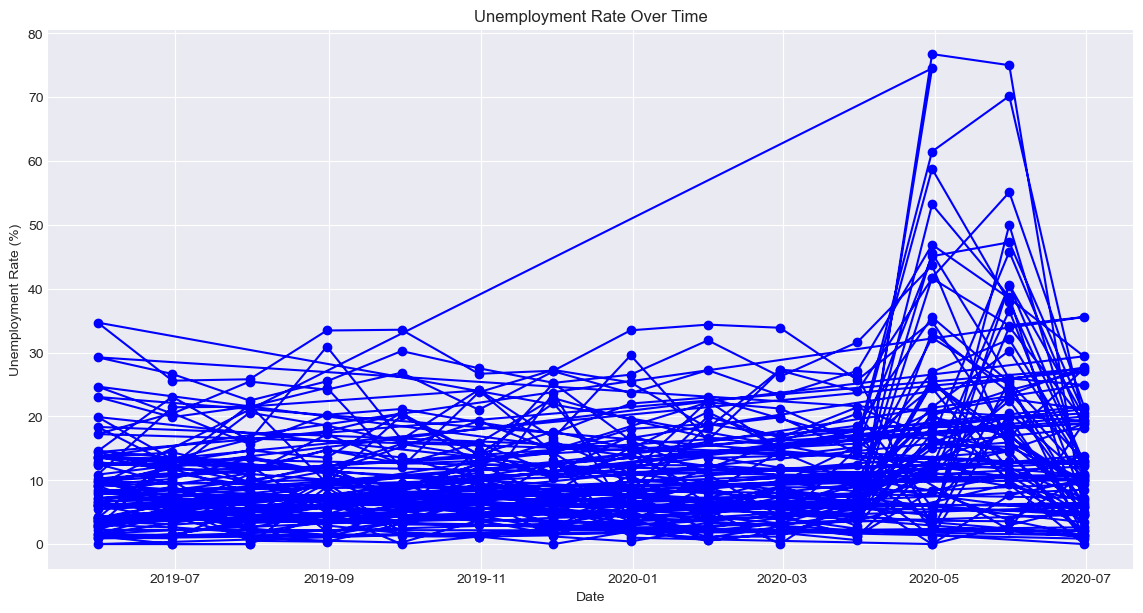

In [34]:
# Ensure the 'Unemployment Rate' column is present
if 'Unemployment Rate' not in data.columns:
    print("\nError: 'Unemployment Rate' column not found in the dataset.")
    print("Available columns are:", data.columns)
else:
    # Plotting the Unemployment Rate over time
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Unemployment Rate'], marker='o', linestyle='-', color='b')
    plt.title('Unemployment Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()


# Descriptive Statistics

In [35]:
    # Descriptive statistics of the unemployment rate
    print("\nDescriptive statistics of the Unemployment Rate:")
    print(data['Unemployment Rate'].describe())



Descriptive statistics of the Unemployment Rate:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Unemployment Rate, dtype: float64


# Monthly Unemployment Rate Analysis

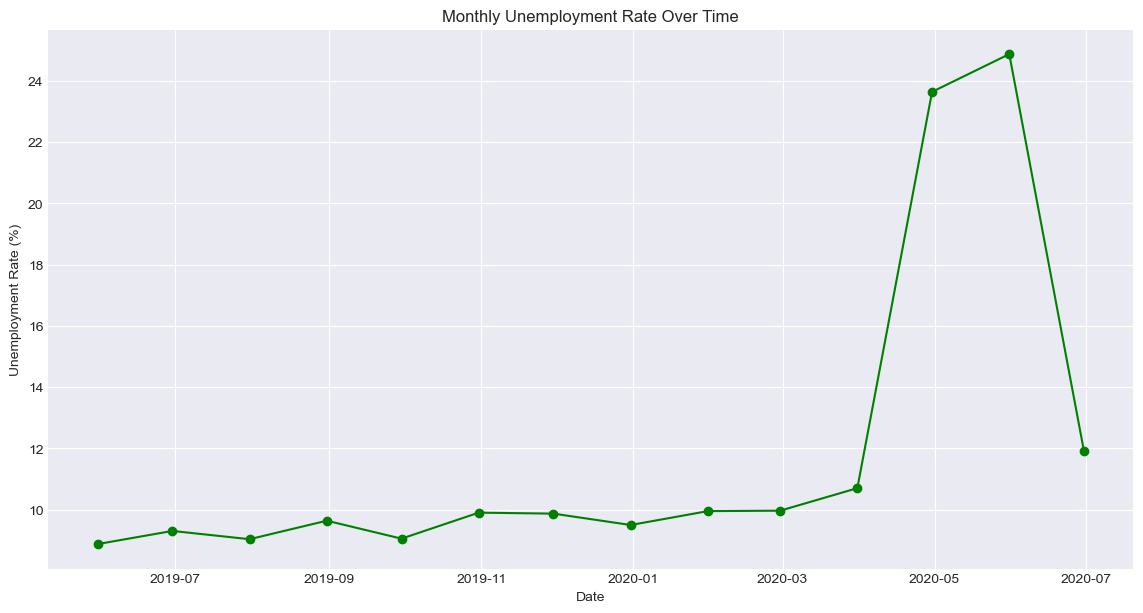

In [36]:
    # Monthly unemployment rate analysis
    monthly_data = data['Unemployment Rate'].resample('M').mean()

    # Plotting the monthly unemployment rate
    plt.figure(figsize=(14, 7))
    plt.plot(monthly_data.index, monthly_data, marker='o', linestyle='-', color='g')
    plt.title('Monthly Unemployment Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()


# Impact of COVID-19 on Unemployment

C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\449943358.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  pre_covid = data['Unemployment Rate']['2019-01-01':'2020-02-29']
C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\449943358.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  post_covid = data['Unemployment Rate']['2020-03-01':]


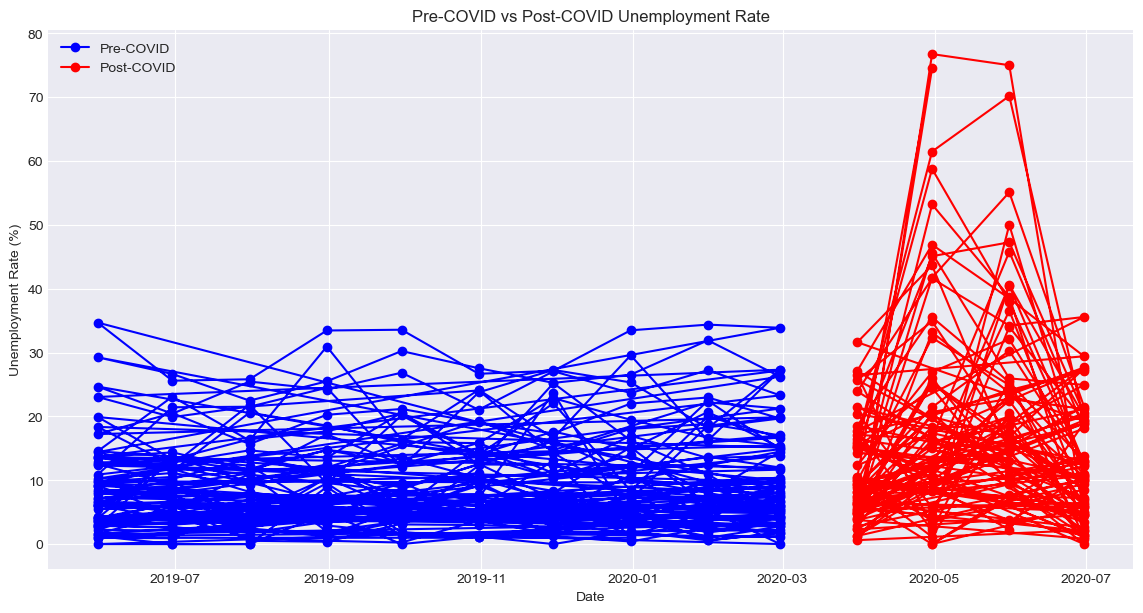

In [37]:
    # Analyzing the impact of COVID-19 on unemployment
    # Assuming COVID-19 impact started around March 2020
    pre_covid = data['Unemployment Rate']['2019-01-01':'2020-02-29']
    post_covid = data['Unemployment Rate']['2020-03-01':]

    # Plotting pre-COVID vs post-COVID unemployment rates
    plt.figure(figsize=(14, 7))
    plt.plot(pre_covid.index, pre_covid, label='Pre-COVID', marker='o', linestyle='-', color='b')
    plt.plot(post_covid.index, post_covid, label='Post-COVID', marker='o', linestyle='-', color='r')
    plt.title('Pre-COVID vs Post-COVID Unemployment Rate')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Descriptive Statistics Pre-COVID and Post-COVID

In [38]:
    # Descriptive statistics pre-COVID
    print("\nDescriptive statistics of the Unemployment Rate pre-COVID:")
    print(pre_covid.describe())

    # Descriptive statistics post-COVID
    print("\nDescriptive statistics of the Unemployment Rate post-COVID:")
    print(post_covid.describe())



Descriptive statistics of the Unemployment Rate pre-COVID:
count    536.000000
mean       9.509534
std        7.358863
min        0.000000
25%        4.287500
50%        7.115000
75%       12.840000
max       34.690000
Name: Unemployment Rate, dtype: float64

Descriptive statistics of the Unemployment Rate post-COVID:
count    204.000000
mean      17.774363
std       15.033663
min        0.000000
25%        6.857500
50%       14.520000
75%       23.965000
max       76.740000
Name: Unemployment Rate, dtype: float64


# Correlation Analysis


Correlation matrix:
                           Unemployment Rate  Employed  \
Unemployment Rate                   1.000000 -0.222876   
Employed                           -0.222876  1.000000   
Labour Participation Rate           0.002558  0.011300   

                           Labour Participation Rate  
Unemployment Rate                           0.002558  
Employed                                    0.011300  
Labour Participation Rate                   1.000000  


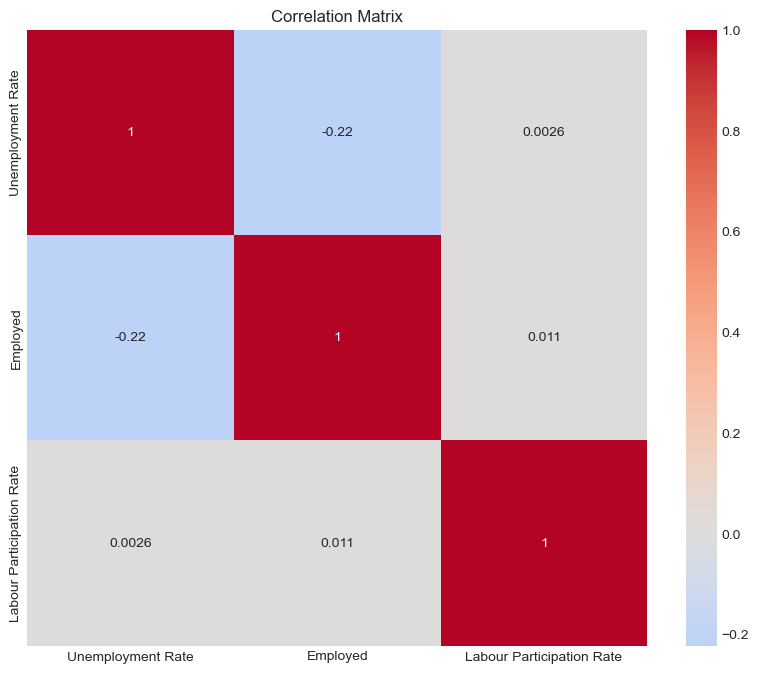

In [39]:
    # Correlation analysis (if there are other columns like GDP, Inflation, etc.)
    # Assuming the dataset has more columns for this example
    if 'Employed' in data.columns and 'Labour Participation Rate' in data.columns:
        correlation_matrix = data[['Unemployment Rate', 'Employed', 'Labour Participation Rate']].corr()
        print("\nCorrelation matrix:")
        print(correlation_matrix)

        # Plotting the correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix')
        plt.show()
